In [81]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [82]:
# load csv
df=pd.read_csv("C:/Users/ambik/Documents/Nobel prize winner/nobel.csv")

In [83]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [84]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [85]:
df.shape

(911, 18)

In [86]:
#drop all missing data
df.dropna(inplace=True)

In [87]:
df.isnull().sum()

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

In [88]:
df.shape

(404, 18)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 856
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  404 non-null    int64 
 1   category              404 non-null    object
 2   prize                 404 non-null    object
 3   motivation            404 non-null    object
 4   prize_share           404 non-null    object
 5   laureate_id           404 non-null    int64 
 6   laureate_type         404 non-null    object
 7   full_name             404 non-null    object
 8   birth_date            404 non-null    object
 9   birth_city            404 non-null    object
 10  birth_country         404 non-null    object
 11  sex                   404 non-null    object
 12  organization_name     404 non-null    object
 13  organization_city     404 non-null    object
 14  organization_country  404 non-null    object
 15  death_date            404 non-null    ob

In [90]:
# change year column to datetme format from int
#df['year'] = df['year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))

In [91]:
df.describe()

,year,laureate_id
count,404.000000,404.000000
mean,1956.358911,291.757426
std,27.903545,209.357295
min,1901.000000,1.000000
25%,1934.750000,134.500000
50%,1960.000000,255.000000
75%,1978.000000,384.250000
max,2012.000000,883.000000


In [92]:
df['category'].value_counts()

Medicine     142
Physics      115
Chemistry    109
Economics     38
Name: category, dtype: int64

<AxesSubplot:xlabel='year'>

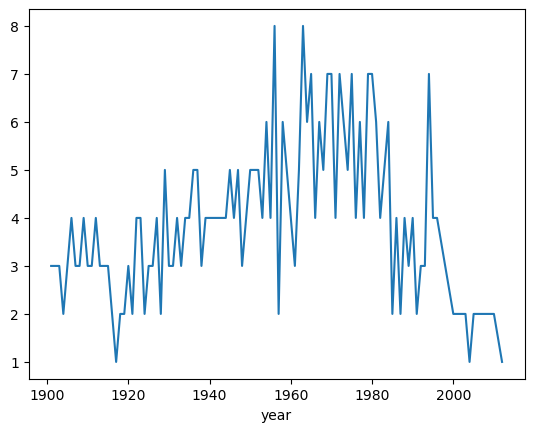

In [93]:
df.groupby(df['year'])['laureate_id'].count().plot(kind='line')

([], [])

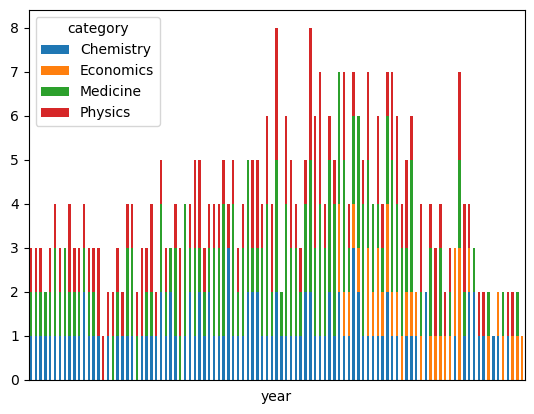

In [94]:
df.groupby(['year','category']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks([])

<AxesSubplot:ylabel='sex'>

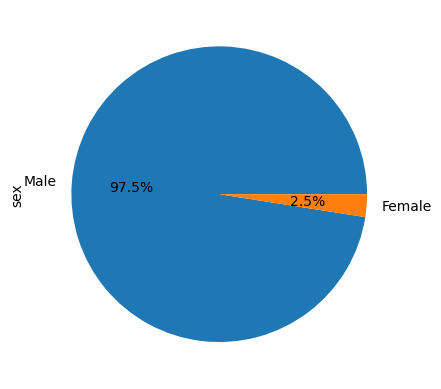

In [95]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

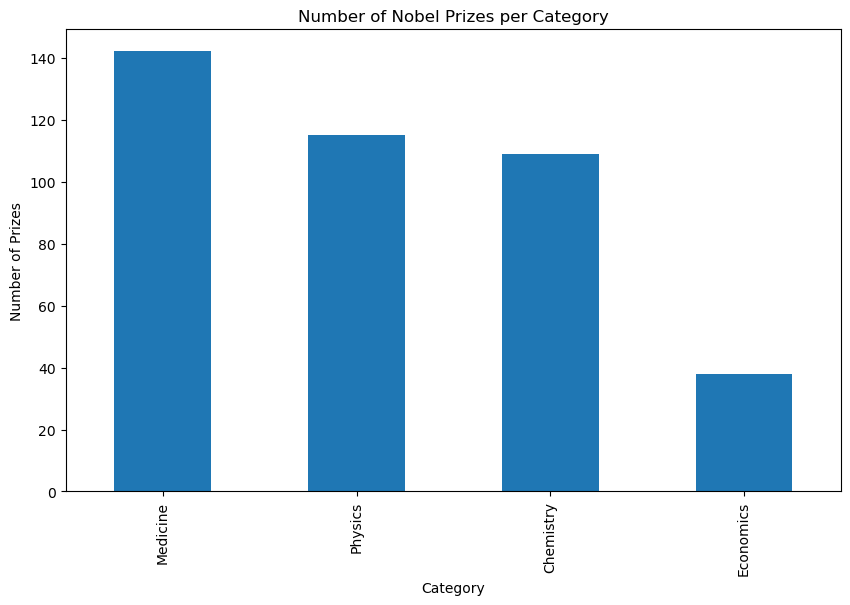

In [96]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Number of Nobel Prizes per Category')
plt.xlabel('Category')
plt.ylabel('Number of Prizes')
plt.show()

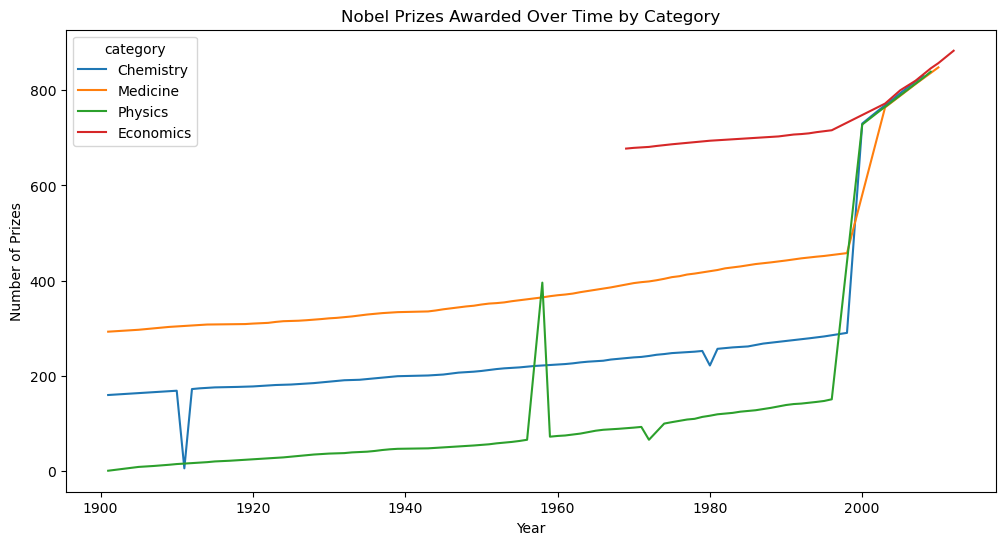

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='laureate_id', hue='category', ci=None)
plt.title('Nobel Prizes Awarded Over Time by Category')
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.show()

In [98]:
# convert birthdate and death date column to datetime
df['birth_date']=pd.to_datetime(df['birth_date'])
df['death_date']=pd.to_datetime(df['death_date'])

In [99]:
df['Age']=df['death_date']-df['birth_date']

In [100]:
df.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,21366 days
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,23026 days


In [101]:
df.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_id                       int64
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
sex                              object
organization_name                object
organization_city                object
organization_country             object
death_date               datetime64[ns]
death_city                       object
death_country                    object
Age                     timedelta64[ns]
dtype: object

<AxesSubplot:xlabel='count', ylabel='organization_country'>

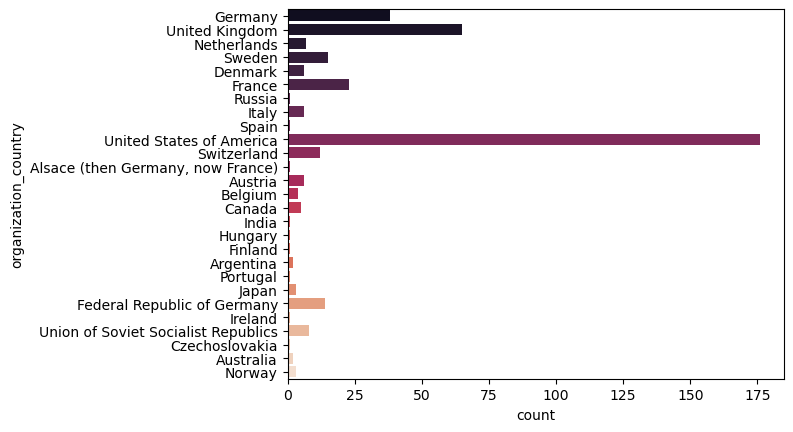

In [102]:
sns.countplot(y='organization_country', data=df, palette='rocket')

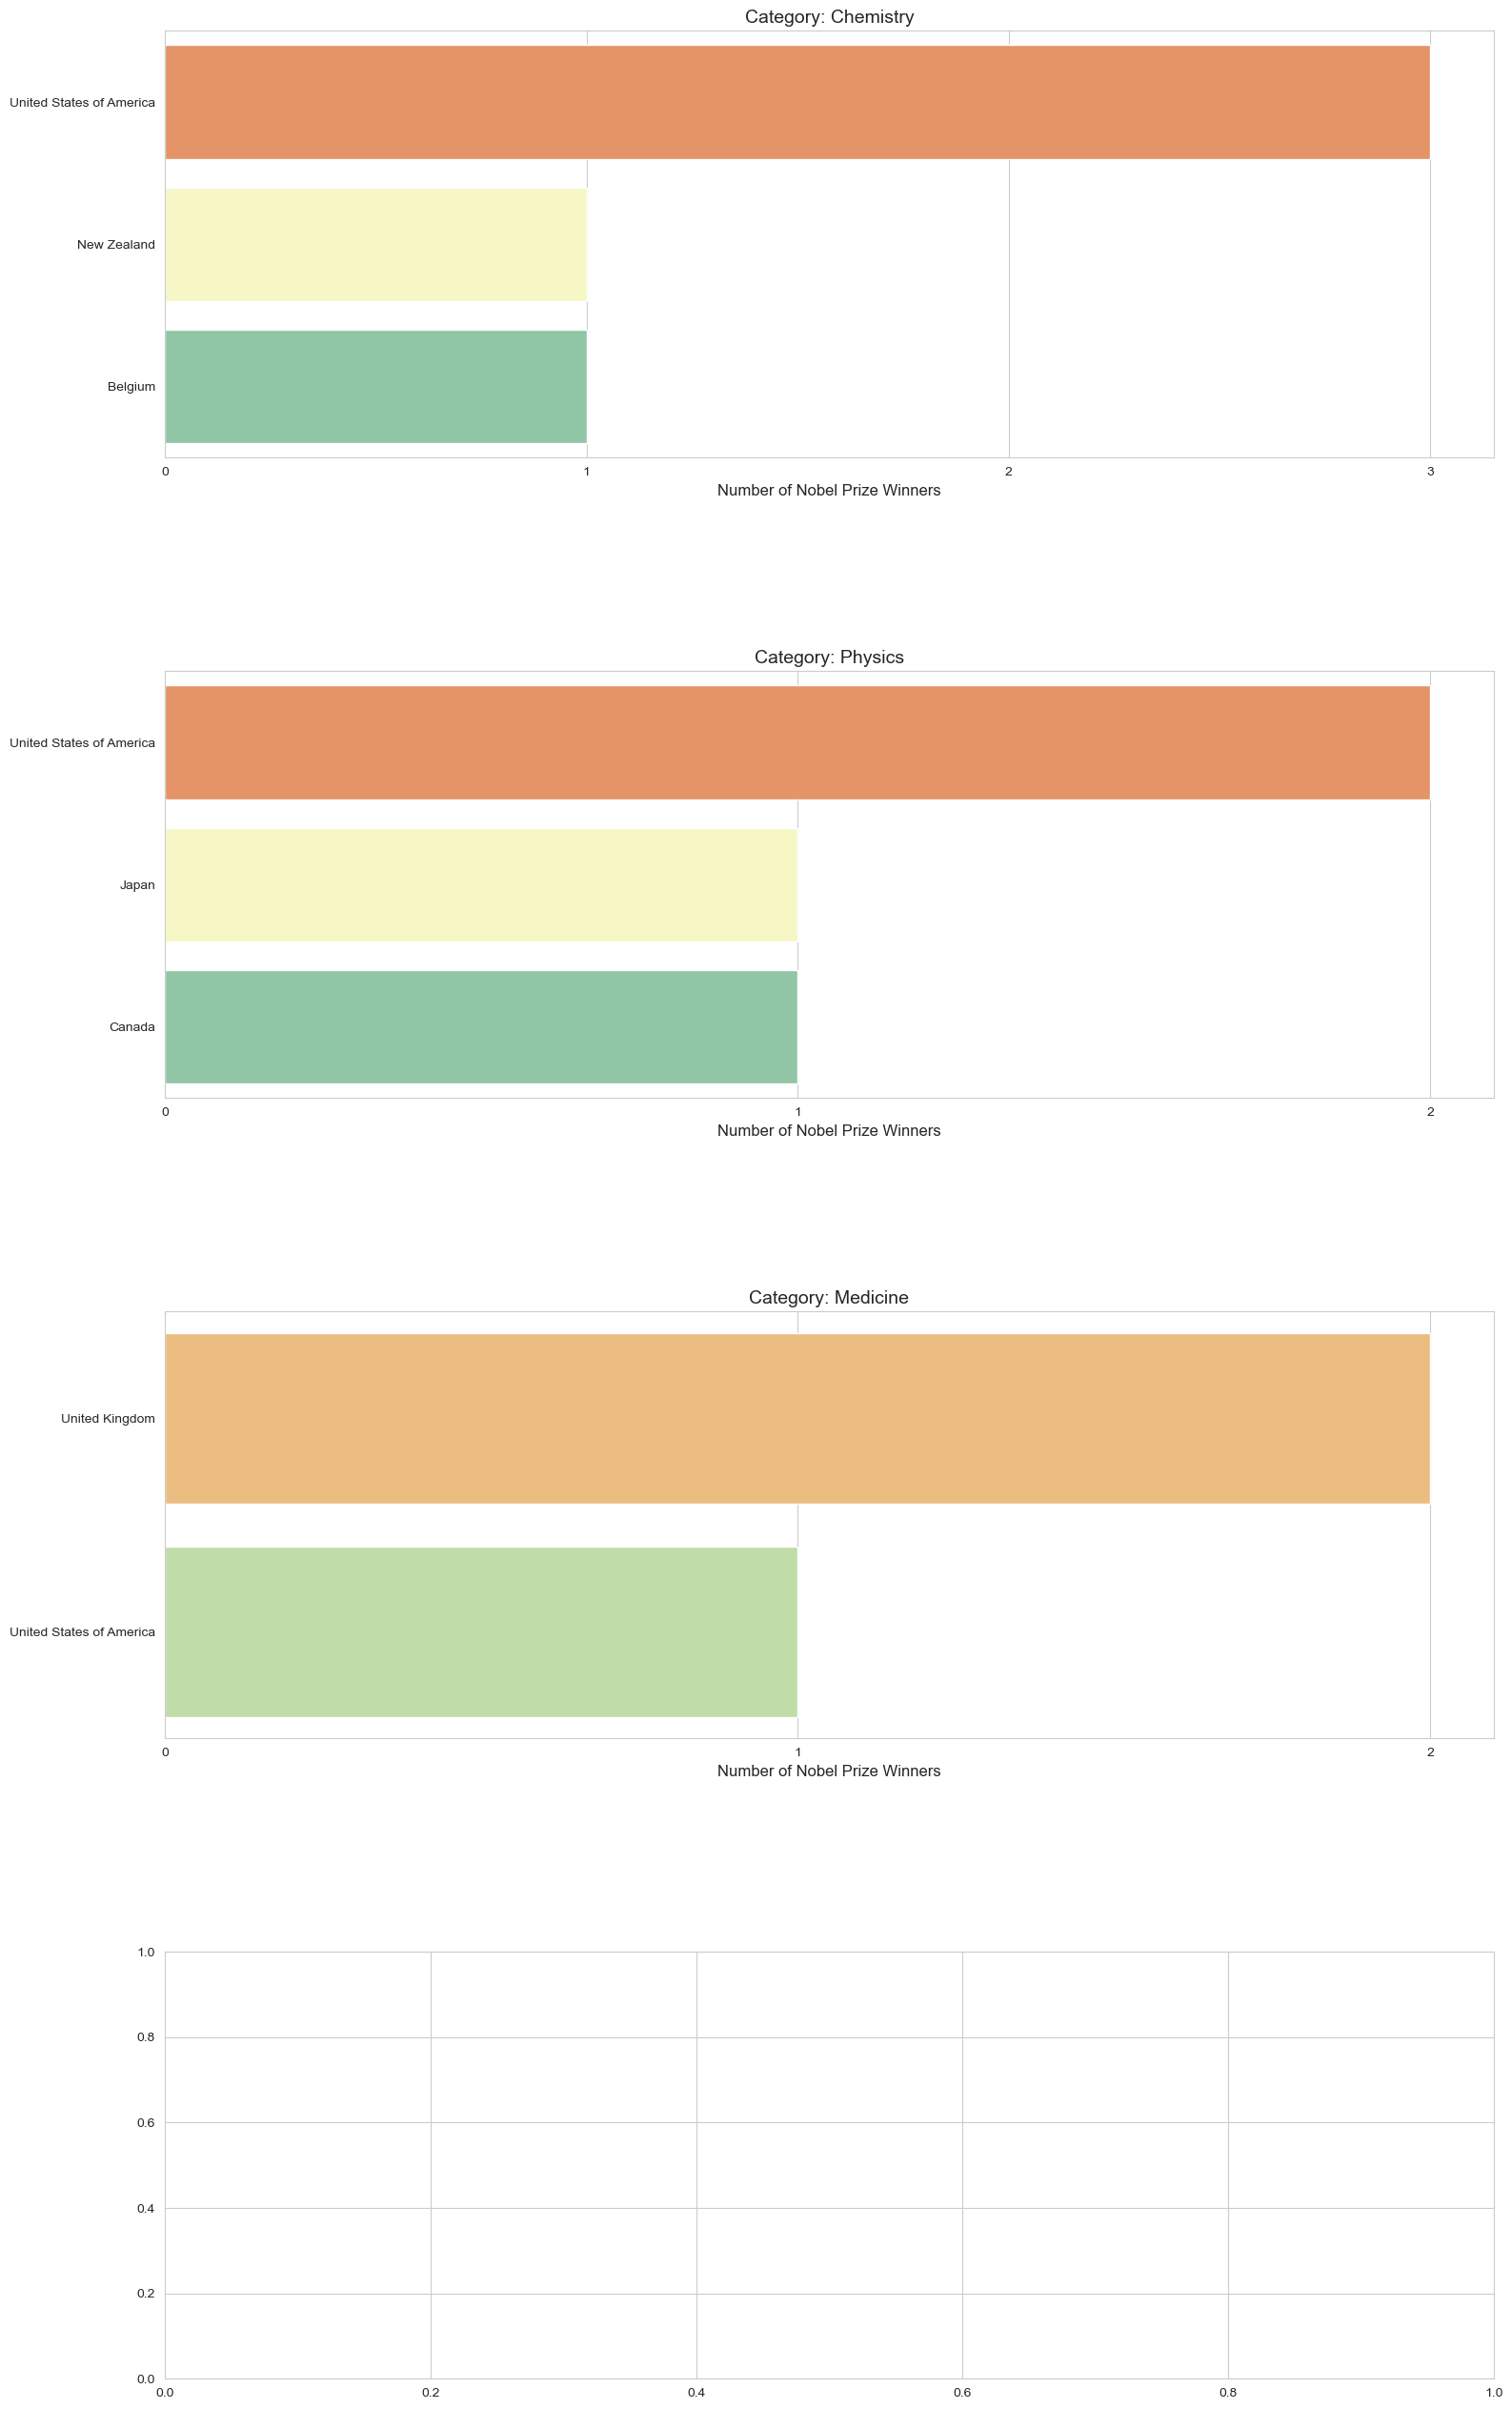

In [105]:
# A separate visualization is also requested for each category.


# Subsetting the DataFrame to include the data only for Nobel Prize winners after 2000 in certain categories

except_eco_nobel_2000s_df = df[(df['category'].isin(['Chemistry', 'Literature', 'Physics', 'Medicine']))
                                    & (df['year'] >= 2000)].reset_index(drop=True)


specific_categories = except_eco_nobel_2000s_df['category'].unique()



# Seaborn and Matplotlib Data Visualisation

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18, 32))
axes = axes.flatten()

sns.set_style('whitegrid')  # Please run it twice if it is not on a whitegrid layout


for i, category in enumerate(specific_categories):
    
    
    # Subsetting the DataFrame each time per different category
    
    enumerated_category = except_eco_nobel_2000s_df[except_eco_nobel_2000s_df['category'] == category] 
    
    
    
    # Barplot/Countplot Visualisation of 'Decade' Attribute
    
    top_10_countries = enumerated_category['birth_country'].value_counts().head(10)
    top_10_country_order = top_10_countries.index
    
    ax_count =  axes[i]
    sns.countplot(data=enumerated_category, y='birth_country', palette='Spectral', order=top_10_country_order, 
                  ax=ax_count)
    
    ax_count.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
   
    ax_count.set_title(f'Category: {category}', fontsize=14)
    
    ax_count.set_xlabel('Number of Nobel Prize Winners', fontsize=12)
    ax_count.set_ylabel('')
           

plt.subplots_adjust(hspace=0.5) # Adjusting the distance between each set of graphs
plt.show()